In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Read data

In [4]:
activity = pd.read_csv('activity_data.csv')

In [357]:
hotel = pd.read_csv('hotel_data.csv')

In [337]:
rental_by_zip = pd.read_csv('rental_prices.csv')

In [338]:
hotel_with_zip = pd.read_csv('hotel_zip1.csv')

## New Data 

In [5]:
booking = activity[activity.user_action == 'booking']

In [23]:
booking.head(4)

,date,user_id,user_country,device,hotel_id,user_action
444,2019-01-19,306169,Sweden,osx,80110,booking
471,2019-01-06,82352,Sweden,iphone_browser,122005,booking
522,2019-01-14,347040,United States,windows,99288,booking
681,2019-01-17,150954,United Kingdom,windows,1646128,booking


In [24]:
booking_location = pd.merge(booking, hotel[['hotel_id', 'city_name', 'hotel_type']], on = 'hotel_id')

In [25]:
booking_location.head(4)

,date,user_id,user_country,device,hotel_id,user_action,city_name,hotel_type
0,2019-01-19,306169,Sweden,osx,80110,booking,New York City,Hotel
1,2019-01-01,50419,United States,osx,80110,booking,New York City,Hotel
2,2019-01-27,140594,Ireland,iphone_browser,80110,booking,New York City,Hotel
3,2019-01-09,245468,United States,windows,80110,booking,New York City,Hotel


In [104]:
def label_country_group (row):
    if row['user_country'] == "United States":
        return 'Domestic'
    if row['user_country'] == "Canada":
        return 'English International'
    if row['user_country'] == "Australia":
        return 'English International'
    if row['user_country'] == "United Kingdom":
        return 'English International'
    if row['user_country'] == "Ireland":
        return 'English International'
    if row['user_country'] == "Ghana":
        return 'English International'
    if row['user_country'] == "Kenya":
        return 'English International'
    if row['user_country'] == "Lesotho":
        return 'English International'
    if row['user_country'] == "Malta":
        return 'English International'
    if row['user_country'] == "Namibia":
        return 'English International'
    if row['user_country'] == "New Zealand":
        return 'English International'
    if row['user_country'] == "Nigeria":
        return 'English International'
    if row['user_country'] == "Singapore":
        return 'English International'
    if row['user_country'] == "South Africa":
        return 'English International'
    if row['user_country'] == "Uganda":
        return 'English International'
    return 'International'

In [105]:
def label_city_place (row):
    if row['city_name'] == 'New York City':
        return 'New York City'
    if row['city_name'] == 'Brooklyn':
        return 'Brooklyn'
    if row['city_name'] == 'Queens':
        return 'Queens'
    return 'Jersey'

In [106]:
booking_location['country_group'] = booking_location.apply (lambda row: label_country_group (row),axis=1)

In [107]:
booking_location['city_place'] = booking_location.apply (lambda row: label_city_place (row),axis=1)

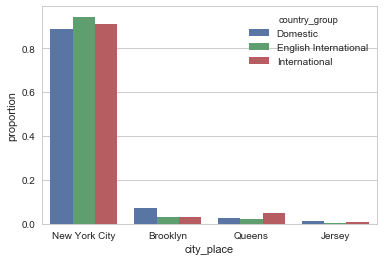

In [108]:
booking_location['city_place'].groupby(booking_location['country_group']).value_counts(normalize=True).rename("proportion").reset_index().pipe((sns.barplot, "data"), x="city_place", y="proportion", hue="country_group")

In [167]:
hello = activity[activity.user_action=='booking'].groupby("user_country").agg({"user_id": pd.Series.nunique})

In [168]:
hello.columns = ["booking_number"]

In [169]:
hello2 = activity.groupby("user_country").agg({"user_id": pd.Series.nunique})

In [170]:
hello2.columns = ['total_users']

In [171]:
hello3 = activity[activity.user_action=='hotel_website_click'].groupby("user_country").agg({"user_id": pd.Series.nunique})

In [178]:
hello3.columns = ['users_click_hotel_web']

In [194]:
users_hotel_web = activity[activity.user_action=='hotel_website_click']

In [196]:
users_both_hotel_and_book = pd.merge(users_hotel_web, booking, on = 'user_id', how = 'inner')

In [201]:
hello4 = users_both_hotel_and_book.groupby("user_country_x").agg({"user_id": pd.Series.nunique})

In [202]:
hello4.columns = ["booked_and_hotel_web"]

In [179]:
numbers_by_country = hello.join(hello2, how = 'outer')

In [180]:
numbers_by_country = numbers_by_country.join(hello3, how = 'outer')

In [203]:
numbers_by_country = numbers_by_country.join(hello4, how = 'outer')

In [204]:
numbers_by_country = numbers_by_country.fillna(0)

In [205]:
numbers_by_country['percent_booked'] = (numbers_by_country['booking_number']/numbers_by_country['total_users'])

In [206]:
numbers_by_country['percent_go_website'] = (numbers_by_country['users_click_hotel_web']/numbers_by_country['total_users'])

In [207]:
numbers_by_country['percent_go_website_no_book'] = ((numbers_by_country['users_click_hotel_web']-numbers_by_country['booked_and_hotel_web'])/numbers_by_country['total_users'])

In [208]:
numbers_by_country[numbers_by_country['booking_number'] > 10].sort_values(["percent_go_website_no_book"], ascending=False)

,booking_number,total_users,users_click_hotel_web,percent_booked,percent_go_website,booked_and_hotel_web,percent_go_website_no_book
United States,4446.0,147305,13314.0,0.030182,0.090384,433.0,0.087444
Singapore,20.0,1054,84.0,0.018975,0.079696,0.0,0.079696
Canada,328.0,13609,1106.0,0.024102,0.081270,39.0,0.078404
New Zealand,11.0,753,61.0,0.014608,0.081009,2.0,0.078353
Australia,162.0,9117,685.0,0.017769,0.075134,20.0,0.072941
Finland,26.0,1137,81.0,0.022867,0.071240,2.0,0.069481
Israel,56.0,1709,122.0,0.032768,0.071387,9.0,0.066121
Switzerland,71.0,3240,214.0,0.021914,0.066049,9.0,0.063272
Belgium,28.0,2226,133.0,0.012579,0.059748,3.0,0.058401
Sweden,75.0,2795,171.0,0.026834,0.061181,8.0,0.058318


In [229]:
numbers_by_country['user_country'] = numbers_by_country.index

In [230]:
numbers_by_country['country_group'] = numbers_by_country.apply (lambda row: label_country_group (row),axis=1)

In [232]:
country_group_numbers = numbers_by_country.groupby('country_group').sum()

In [235]:
country_group_numbers['percent_booked'] = country_group_numbers['booking_number']/country_group_numbers['total_users']

In [239]:
country_group_numbers['country_group'] = country_group_numbers.index

NameError: name 'plot' is not defined

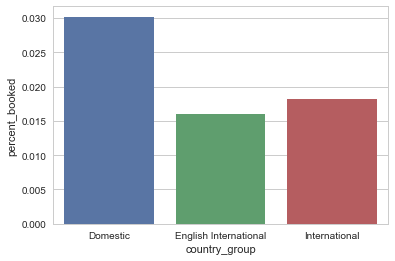

In [240]:
ax = sns.barplot(x="country_group", y="percent_booked", data=country_group_numbers)
plot.show()

## Zip Code Data Cleaning

In [3]:
rental_by_zip = pd.read_csv('rental_prices.csv')
hotel_with_zip = pd.read_csv('hotelcombined2.csv')

rental_by_zip = rental_by_zip.groupby('zipcode').sum()/7
rental_by_zip['zipcode'] = rental_by_zip.index
rental_by_zip['zipcode']=rental_by_zip['zipcode'].apply(lambda x: int(float('{0:0>5}'.format(x))))

hotel_with_zip['zipcode'] = hotel_with_zip['zipcode'].fillna(0)
hotel_with_zip['zipcode']=hotel_with_zip['zipcode'].apply(lambda x: int(float('{0:0>5}'.format(x))))

hotel_with_rental_price = pd.merge(hotel_with_zip, rental_by_zip[['zipcode', '1_br_total']], on = 'zipcode', how = 'left')
hotel_with_rental_price = hotel_with_rental_price.drop("Unnamed: 0", axis = 1)

#If decide want 0s instead of NaNs: 
hotel_with_rental_price['1_br_total'] = hotel_with_rental_price['1_br_total'].fillna(0)

hotel_with_rental_price.to_csv('hotel_data_with_prices.csv', encoding='utf-8', index = False)


## Exploratory Data Analysis

### Activity dataset

In [4]:
print(activity.shape)
activity.head(3)

(1577114, 6)


,date,user_id,user_country,device,hotel_id,user_action
0,2019-01-07,314066,Italy,iphone_native_app,570101,view
1,2019-01-02,314066,Italy,iphone_native_app,6002536,view
2,2019-01-19,84981,United Kingdom,iphone_native_app,1858923,view


#### Sizing

In [20]:
print('There are %s user-hotel actions'% len(activity)) 
print('There are %s unique users'% len(activity['user_id'].unique()))
print('There are %s unique users with booking'% len(activity[activity.user_action=='booking']['user_id'].unique()))
print('There are %s users with booking' %len(activity[activity.user_action=='booking']['user_id']))
print('There are %s unique hotels'% len(activity['hotel_id'].unique())) 
print('There are %s unique hotels with booking'% len(activity[activity.user_action=='booking']['hotel_id'].unique()))

There are 1577114 user-hotel actions
There are 363619 unique users
There are 8203 unique users with booking
There are 8718 users with booking
There are 1057 unique hotels
There are 563 unique hotels with booking


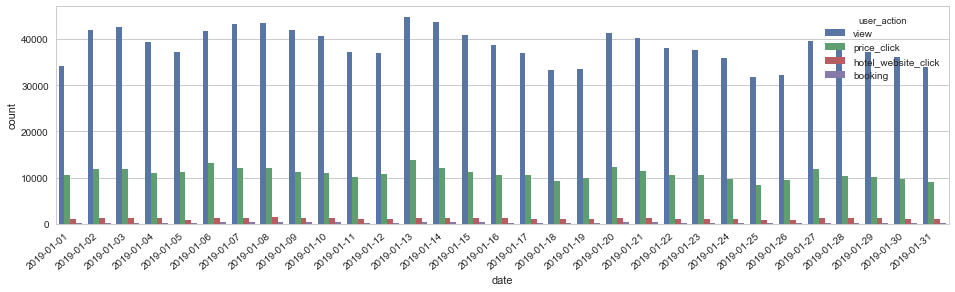

In [21]:
fig, ax = plt.subplots(figsize=(16, 4))
ax=sns.countplot( x='date', hue="user_action",data=activity.sort_values('date'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### Type of user_action

In [7]:
activity['user_action'].value_counts()

view                   1194404
price_click             338356
hotel_website_click      35636
booking                   8718
Name: user_action, dtype: int64

In [8]:
print('Example of funnel')
activity[(activity.user_id==306169) &(activity.hotel_id==80110)]

Example of funnel


,date,user_id,user_country,device,hotel_id,user_action
442,2019-01-19,306169,Sweden,osx,80110,price_click
444,2019-01-19,306169,Sweden,osx,80110,booking
445,2019-01-19,306169,Sweden,osx,80110,view


#### User-hotel interactions

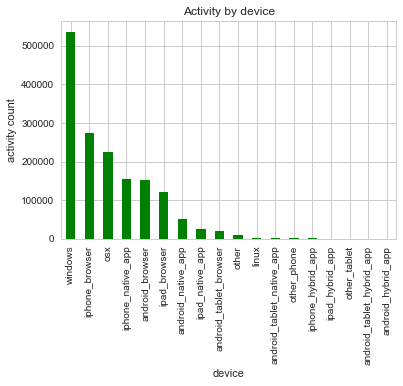

In [9]:
# Activity by device
ax=activity['device'].value_counts().plot(kind='bar', color='green', title = 'Activity by device' )
ax.set_xlabel("device")
ax.set_ylabel("activity count")

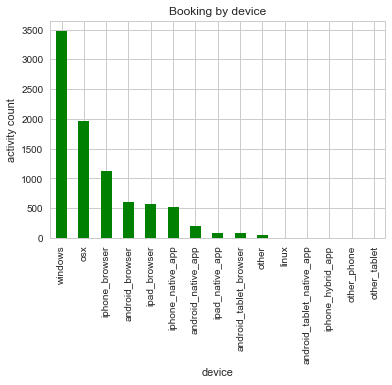

In [7]:
# Booking by device
ax=booking['device'].value_counts().plot(kind='bar', color='green', title = 'Booking by device' )
ax.set_xlabel("device")
ax.set_ylabel("activity count")

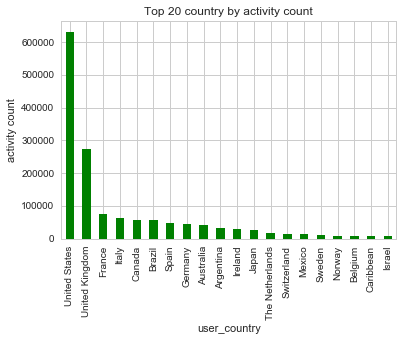

In [10]:
# Popular user country
ax=activity['user_country'].value_counts().head(20).plot(kind='bar', color='green', title = 'Top 20 country by activity count' )
ax.set_xlabel("user_country")
ax.set_ylabel("activity count")

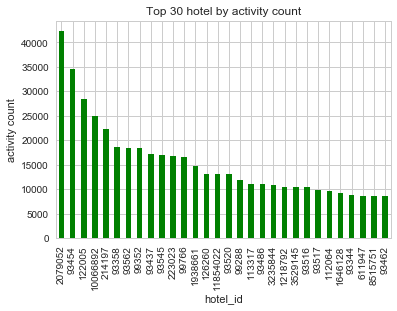

In [11]:
# popular hotels
ax=activity['hotel_id'].value_counts().head(30).plot(kind='bar', color='green', title = 'Top 30 hotel by activity count' )
ax.set_xlabel("hotel_id")
ax.set_ylabel("activity count")

### Hotel dataset EDA

In [12]:
print(hotel.shape)
hotel.head(3)

(1057, 9)


,hotel_id,hotel_name,city_name,star_rating,bubble_score,review_count,hotel_type,brand_name,parent_brand_name
0,75737,Night Theater District,New York City,4.0,40.0,2291,Hotel,Night Hotel,Wyndham Hotel Group
1,93401,Heritage Hotel New York City,New York City,2.5,35.0,968,Hotel,None,NaN
2,224217,Clarion Hotel Park Avenue,New York City,2.5,35.0,462,Hotel,Clarion,"Choice Hotels International, Inc."


In [13]:
print('There are %s unique rows'% len(hotel['hotel_id'])) 
print('There are %s unique hotels'% len(hotel['hotel_id'].unique()))


There are 1057 unique rows
There are 1057 unique hotels


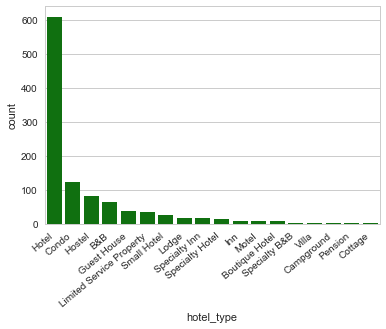

In [14]:
# Hotel type
ax=sns.countplot( x='hotel_type', color='green',data=hotel.sort_values('hotel_type'),
                 order=hotel['hotel_type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

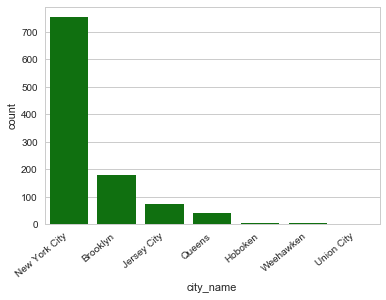

In [15]:
# Hotel city name
ax=sns.countplot( x='city_name', color='green',data=hotel.sort_values('hotel_type'),
                 order=hotel['city_name'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

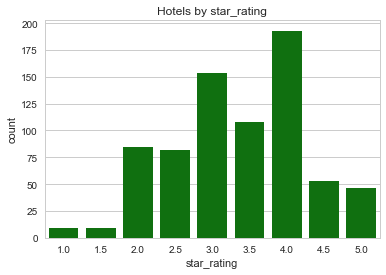

In [16]:
# Star Rating
sns.countplot(x="star_rating", data=hotel, color='green').set_title("Hotels by star_rating")

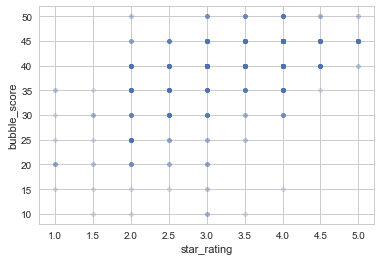

In [17]:
hotel.plot.scatter('star_rating','bubble_score', alpha=0.2)

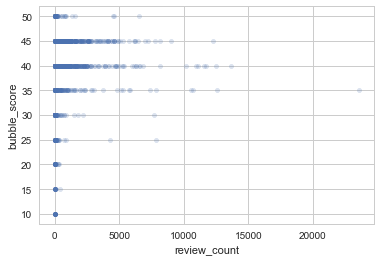

In [18]:
hotel.plot.scatter('review_count','bubble_score', alpha=0.2)